# Introduction

**Constraint satisfaction problem, or CSP: ** a set of variables, each of which has a value. A problem is solved when each variable has a value that satisfies all the constraints on the variable. 



#### In CSP: 

- $\text{The state is defined by set of variables } X_i \text{with values from a set of domains } D_i$. 
- The goal test is a set of constraints specifying allowable combinations of values for subsets of variables.
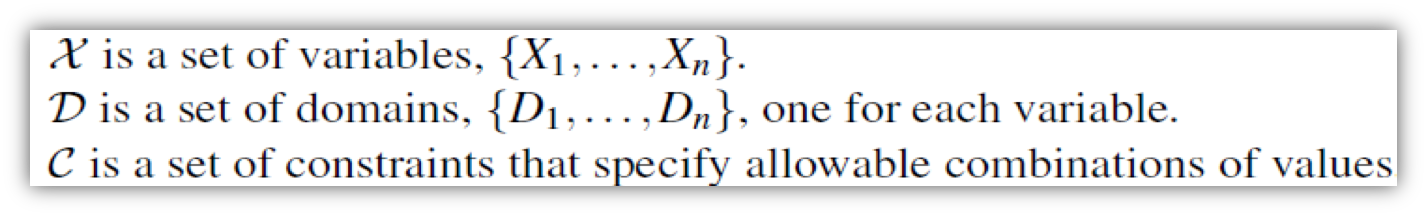 
- The solution is a complete assignment to all variables that satisfies all constraints.


#### Solving CSP: 
- Backtracking
- Constraint propagation: AC-3 algorithm
- Local search 




**Objectives: **
* Understand and implement CSP.
* Solve problems using AC-3 algorithm.

**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: CSP.
- Constraint satisfaction problem 
- AC-3 algorithm 


Part 2: Lab Task.
*	Student solves programming questions using AC-3 algorithm 



# Part 1: CSP

## 1.1 CSP
A CSP can as a search problem, where 

- Initial State: the empty assignment of the variables {}
- Successor function: Assign a value to an unassigned variable provided that it does not violate a constraint.             
- Goal test: the current assignment is complete (A complete assignment is one in which every variable is assigned a value. 
- Path cost: constant cost for every step.  



## 1.2 AC-3 Algorithm 

Arc Consistency Algorithm #3 (AC-3 algorithm) was developed by Alan Mackworth in 1977 and used to solve CSP. The algorithm uses the concept of arc consistency. A variable in a CSP is arc-consistent if every value in its domain satisfies the variable’s binary constraints.

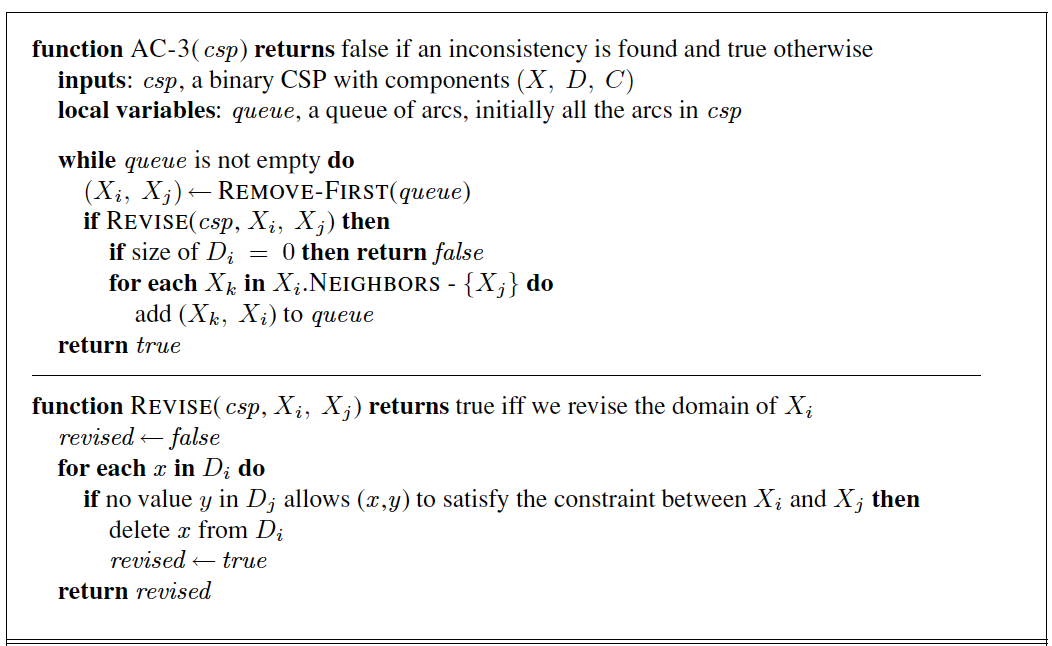

In [23]:
#Code credit: Cesar William Alvarenga 
domains = {
    'A': [1, 2, 3],
    'B': [1, 2, 3],
    'C': [1, 2, 3]
}

constraints = {
    ('A', 'B'): lambda a, b: a > b,
    ('B', 'A'): lambda b, a: b < a,
    ('B', 'C'): lambda b, c: b == c,
    ('C', 'B'): lambda c, b: c == b,
}


def revise(x, y):
    """
    Make variable `x` arc consistent with variable `y`.
    To do so, remove values from `domains[x]` for which there is no
    possible corresponding value for `y` in `domains[y]`.
    Return True if a revision was made to the domain of `x`; return
    False if no revision was made.
    """
    revised = False

    # Get x and y domains
    x_domain = domains[x]
    y_domain = domains[y]

    # Get all arc (x, y) constraints
    all_constraints = [constraint for constraint in constraints if constraint[0] == x and constraint[1] == y]

    for x_value in x_domain:
        satisfies = False
        for y_value in y_domain:
            for constraint in all_constraints:
                constraint_func = constraints[constraint]
                if constraint_func(x_value, y_value):
                    satisfies = True
        if not satisfies:
            x_domain.remove(x_value)
            revised = True

    return revised


def ac3(arcs):
    """
    Update `domains` such that each variable is arc consistent.
    """
    # Add all the arcs to a queue.
    queue = arcs[:]

    # Repeat until the queue is empty
    while queue:
        # Take the first arc off the queue (dequeue)
        (x, y) = queue.pop(0)

        # Make x arc consistent with y
        revised = revise(x, y)

        # If the x domain has changed
        if revised:
            # Add all arcs of the form (k, x) to the queue (enqueue)
            neighbors = [neighbor for neighbor in arcs if neighbor[1] == x]
            queue = queue + neighbors


arcs = [
    ('A', 'B'), 
    ('B', 'A'), 
    ('B', 'C'), 
    ('C', 'B')]

ac3(arcs)

print(domains) # {'A': [2, 3], 'C': [1, 2], 'B': [1, 2]}

{'A': [2, 3], 'B': [1, 2], 'C': [1, 2]}


## Part 2 AC-Algorithm

Assume you have the following CSP,
- Variables: 	A, B, C
- Domains: 	$D_A$ = [4, 5, 6], $D_B$ = [4, 5, 6], $D_C$ = [4, 5, 6]
- Constraints: 	A > B, A != C, B != C. 

Can you find a solution using AC-algorithm?
Show your solution step by step. 

In [24]:
#initializing domains, constraints and arcs
domains = {
    'A': [4, 5, 6],
    'B': [4, 5, 6],
    'C': [4, 5, 6]
}

constraints = {
    ('A', 'B'): lambda a, b: a > b,
    ('A', 'C'): lambda a, c: a!=c,
    ('B', 'C'): lambda b, c: b!= c,
    ('B', 'A'): lambda b, a: b < a,
    ('C', 'A'): lambda c, a: c!= a,
    ('C', 'B'): lambda c, b: c!= b,
}

agenda = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'A'),
    ('C', 'A'),
    ('C', 'B')]

#initializing queue
queue=agenda

#we will iterate each element of queue until it is empty
while queue:
    #pop the first element of queue
    (x,y)=queue.pop(0)
    
    #get the constraints for (x,y) and append it in list
    CS=[]
    for i in constraints:
        if i[0]==x and i[1]==y:
            CS.append(i)
            
    is_changed=False  #we will set this value to True if any item is removed from domain list
    
    #now iterate through each element on x and y domains and check the constraints
    for x_value in domains[x]:
        is_satisfied=False #we will set this to True if constraint is satisfied
        for y_value in domains[y]:
            for constraint in CS:
                constraint_func=constraints[constraint]
                if constraint_func(x_value,y_value):
                    is_satisfied=True
        
        if is_satisfied==False:
            domains[x].remove(x_value) #if x_value does not satified the constraint for  given y_value, we will remove
            is_changed=True  #we will set it to True because domain list is changed 
    
    if is_changed==True: #if the values are changed, we will add new items in queue that has x on its 1 index
        adj = [adj for adj in agenda if adj[1] == x]
        queue = queue + adj
print(domains)


{'A': [5, 6], 'B': [4, 5], 'C': [4, 5, 6]}
